In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_excel("IAC_Data_analyst_Data.xlsx")
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes


* 1. What is the average CGPA of student ? 

In [3]:
avg = df["CGPA"].mean()
avg

8.038475684511647

* 2. What is the distribution of student across different graudation years ?

In [4]:
distribution = df['Year of Graduation'].value_counts().reset_index()
distribution.columns = ['Graduation_year','Number_of_Students']
distribution = distribution.sort_values('Graduation_year')
print(distribution)

   Graduation_year  Number_of_Students
0             2023                1536
1             2024                1511
2             2025                1292
3             2026                 555


* 3. What is the distribution of student’s experience in python programming ?

In [5]:
experience = df['Experience with python (Months)'].value_counts().reset_index()
experience.columns = ['Months','Number_of_Students']
print(experience.to_string(index=False))

 Months  Number_of_Students
      5                1242
      3                1008
      8                 800
      6                 738
      7                 640
      4                 466


* 4. What is the average family income of student ?

In [6]:
income_money_mapping = {
    '0-2 Lakh' : 1,
    '2-5 Lakh' : 3.5,
    '5-7 Lakh' : 6,
    '7 Lakh+' : 7
}
df['midpoint_income'] = df['Family Income'].map(income_money_mapping)
average_income = df['midpoint_income'].mean()
print(f"The average Family income is {average_income:.2f} lakhs")


The average Family income is 1.29 lakhs


* 5. How does the GPA vary among different collages ? (Show Top 5 result only).

In [7]:
college_GPA = df.groupby('College Name')['CGPA'].mean().reset_index()
college_gpa_sorted  =college_GPA.sort_values(by='CGPA',ascending=False)
college_gpa_sorted.head(5)

,College Name,CGPA
23,"THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER...",8.585714
20,St Xavier's College,8.578571
3,"B. K. Birla College of Arts, Science & Commerc...",8.456410
22,"Symbiosis Institute of Technology, Pune",8.303448
2,AP SHAH INSTITUTE OF TECHNOLOGY,8.283333


* 6. Are there any outliers in the quantity (number of courses completed) attribute ?

In [8]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

if outliers.empty:
    print("There are no outliers in the 'quantity' attribute.")
else:
    print("Potential outliers in the 'quantity' attribute:")
    print(outliers)

There are no outliers in the 'quantity' attribute.


* 7. What is the average CGPA for student from each city ?

In [9]:
different_cities = df.groupby('City')['CGPA'].mean().reset_index()
different_cities.head(10)

,City,CGPA
0,Agartala,7.660714
1,Agra,8.046429
2,Ahemdabad,8.190385
3,Ajmer,8.284314
4,Akola,8.021429
5,Aligarh,7.828571
6,Alipore,8.100000
7,Almora,8.039286
8,Ambala,8.018605
9,Ambikapur,8.000000


* 8. Are there any correlation between family income and GPA?

In [10]:
mapping_income = {
    '0-2 Lakh' : 1,
    '2-5 Lakh' : 3.5,
    '5-7 Lakh' : 6,
    '7 Lakh+' : 7
}
df['midpoint_income'] = df['Family Income'].map(mapping_income)
correlation= df['midpoint_income'].corr(df['CGPA'])
print(f"Correlation between Family Income and CGPA is: {correlation:.2f}")

if correlation > 0:
    print("There is positive relationship between them.")
elif correlation <0:
    print("There is negative relationship between them.")
else:
    print("Not Signified")

Correlation between Family Income and CGPA is: 0.02
There is positive relationship between them.


* 9. How many students from various cities ?

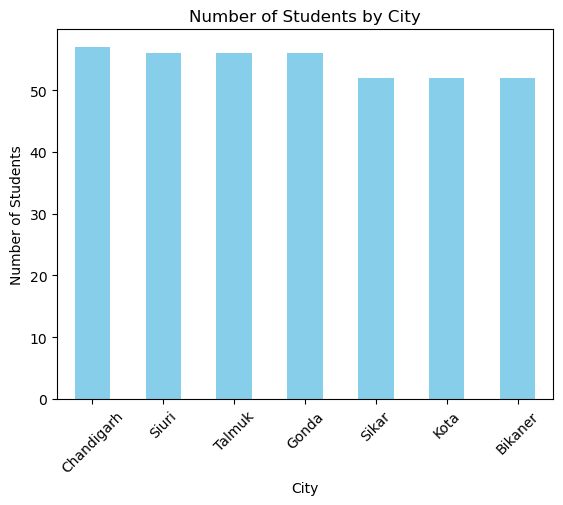

In [11]:
city_count = df['City'].value_counts()
top_n = 7
top_cities = city_count.head(top_n)
top_cities.plot(kind='bar', color='skyblue')
plt.title('Number of Students by City')
plt.xlabel('City')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

* 10. Which event tend to attract more students for specific field of study?

In [12]:
total_events = df.groupby('Events')['Attendee Status'].count().reset_index()
sort_total_events = total_events.sort_values(by='Attendee Status',ascending=False)
sort_total_events.head(1)


,Events,Attendee Status
8,Product Design & Full Stack,842


* 11.Do students in leadership position during their collage year  tend to have higher GPAs or better Expected Salary ?

In [13]:
leadership_position = df[df['Leadership- skills']=='yes']

avg_gpa_leadership_position = leadership_position['CGPA'].mean()
avg_salary_leadership_position = leadership_position['Expected salary (Lac)'].mean()

if avg_gpa_leadership_position > avg_salary_leadership_position:
    print(f"{avg_gpa_leadership_position:.2f} ~ GPAS are better than Expected Salary for student who are in leadership position during thier college year")

elif avg_gpa_leadership_position < avg_salary_leadership_position:
    print(f"{avg_salary_leadership_position:.2f} ~Expected Salary are better then GPAs for student who are in leadership position during thier college year")
else:
    print('Both are equal at this data set')


13.97 ~Expected Salary are better then GPAs for student who are in leadership position during thier college year


* 12. How many student are graduating by the end of 2024 year ? 

In [14]:
graduation_year = df[df['Year of Graduation'] <= 2024]
number_of_student = graduation_year['Year of Graduation'].count()
print("Number of students graduating by the end of 2024:-", number_of_student)




Number of students graduating by the end of 2024:- 3047


* 13. Which promotion channel brings in more student participation for the event ?

In [15]:
df['How did you come to know about this event?'] = df['How did you come to know about this event?'].str.replace('/','|').str.split('|')
df = df.explode('How did you come to know about this event?')
df['How did you come to know about this event?'] = df['How did you come to know about this event?'].str.strip()
total_participation = df.groupby('How did you come to know about this event?')['Attendee Status'].count().reset_index()
print(total_participation)

   How did you come to know about this event?  Attendee Status
0                                   Classmate               70
1                    Cloud Counselage Website              220
2                           College Professor              434
3                                       Email              593
4                                    Facebook               89
5                                      Friend               70
6                                   Instagram               87
7                                    LinkedIn              103
8                                      Others              185
9                                        SPOC              434
10                                   Telegram               33
11                                    Twitter                8
12                                   Whatsapp             1294
13                                    Youtube              124


In [16]:
df['How did you come to know about this event?'] = df['How did you come to know about this event?'].str.strip()

promotion_channel_counts = df.groupby('How did you come to know about this event?')['First Name'].count().reset_index()
promotion_channel_counts.rename(columns={'First Name': 'Participant Count'}, inplace=True)
most_effective_channel = promotion_channel_counts[promotion_channel_counts['Participant Count'] == promotion_channel_counts['Participant Count'].max()]
print(most_effective_channel)

   How did you come to know about this event?  Participant Count
12                                   Whatsapp               1294


* 14. Find the total number of student who attended the event related to data sceince (from all data science related course)

In [17]:
data_science_events = [
    'Data Visualization using Power BI',
    'Artificial Intelligence',
    'Hello ML and DL',
    'IS DATA SCIENCE FOR YOU?',
    'RPA: A Boon or A Bane',
    'The Agile Ways of Working',
    'The SDLC & their transformations',
    'Transformation with DevOps: The Easy Way'
]
data_science_attendance = df[df['Events'].isin(data_science_events)]
total_students_attended_DS = data_science_attendance['First Name'].nunique()
print("Total number of students who attended data science-related events:", total_students_attended_DS)

Total number of students who attended data science-related events: 1148


* 15.How does the expected salary vary based on factor like ‘CGPA’, ‘Family Income’, ‘Experience with python(Months)’?

In [18]:
for column in df.columns:
    df[column] = df[column].drop_duplicates(keep='first').reset_index(drop=True)
    
salary_by_factors = df.groupby(['CGPA', 'Family Income', 'Experience with python (Months)'])['Expected salary (Lac)'].mean().reset_index()

print("Expected Salary Variation by Factors:")
print(salary_by_factors)

Expected Salary Variation by Factors:
   CGPA Family Income  Experience with python (Months)  Expected salary (Lac)
0   6.5      5-7 Lakh                              4.0                    8.0
1   6.7       7 Lakh+                              7.0                    6.0
2   8.2      0-2 Lakh                              3.0                    7.0
3   8.7      2-5 Lakh                              5.0                   10.0


* 16. How many students know about the event from their college? which of these top 5 collages?

In [19]:
college_attendees = df[df['Specify in "Others" (how did you come to know about this event)'] == 'College']
college_counts = college_attendees['College Name'].value_counts()
top_5_colleges = college_counts.head(5)

print("Number of students who learned about the event from their colleges:")
print(college_counts)

print("\nTop 5 colleges from which students learned about the event:")
print(top_5_colleges)

Number of students who learned about the event from their colleges:
AP SHAH INSTITUTE OF TECHNOLOGY     1
Name: College Name, dtype: int64

Top 5 colleges from which students learned about the event:
AP SHAH INSTITUTE OF TECHNOLOGY     1
Name: College Name, dtype: int64


In [20]:
college_known_students = df[df['Specify in "Others" (how did you come to know about this event)'].str.contains('College', case=False, na=False)]

num_students_from_college = len(college_known_students)

print("Number of students who know about the event from their college:", num_students_from_college)

Number of students who know about the event from their college: 1
